# Linear Regression Exercise

## Use linear regression on the *bodyfat* dataset

We are going to follow the same pipeline than in the lab session but now with a simple dataset.  

- [ ] Visualize your dataset. Does it have anything strange?
- [ ] Split your dataset in train and test. 
- [ ] Design a pre-processing for your dataset and apply it to your partitions. 
- [ ] Train a Linear Regression model.
- [ ] Train a Ridge Regression model with cross-validation.  
- [ ] Train a Lasso Regression model with cross-validation.  
- [ ] Compare your three models using cross-validation metrics and looking into their weights. Do they show strong differences?
- [ ] Compute the generalization performance of the best model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

In [8]:
bodyfat_data = pd.read_csv("bodyfatdata.txt", sep='\s+', names=['triceps', 'thigh', 'midarm', 'bodyfat'])

N=bodyfat_data.shape[0]
bodyfat_data.describe()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/kk/fszrrjc10hjbfby2kz8vpsf00000gn/T/ipykernel_48393/252415238.py:1: SyntaxWarning: invalid escape sequence '\s'
  bodyfat_data = pd.read_csv("bodyfatdata.txt", sep='\s+', names=['triceps', 'thigh', 'midarm', 'bodyfat'])


,triceps,thigh,midarm,bodyfat
count,20.000,20.000,20.000,20.000
mean,25.305,51.170,27.620,20.195
std,5.023,5.235,3.647,5.106
min,14.600,42.200,21.300,11.700
25%,21.500,47.775,24.750,17.050
50%,25.550,52.000,27.900,21.200
75%,29.900,54.625,30.025,24.275
max,31.400,58.600,37.000,27.200


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

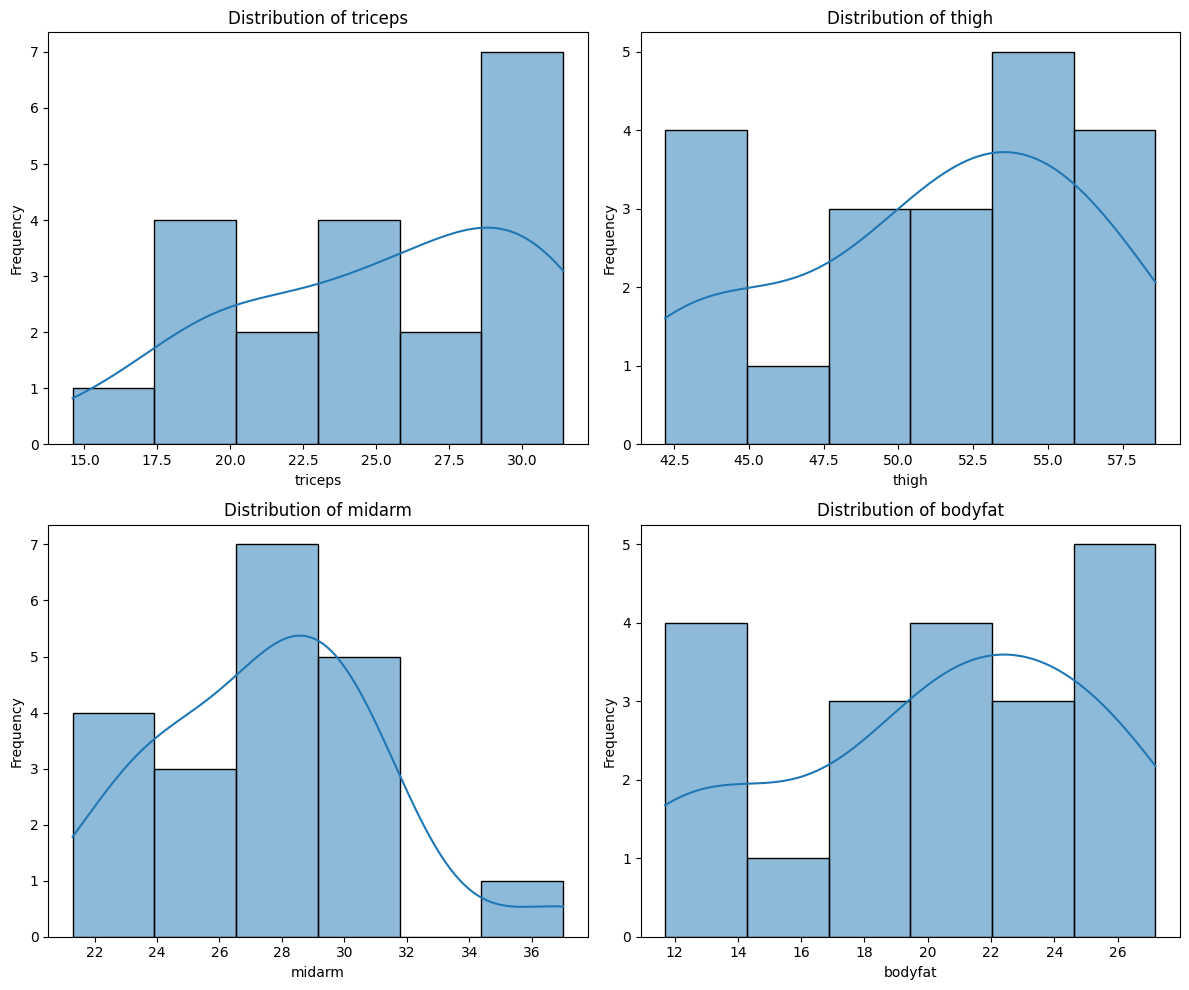

In [ ]:
# Create histograms of all variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot histogram for each column
for i, column in enumerate(bodyfat_data.columns):
    sns.histplot(bodyfat_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

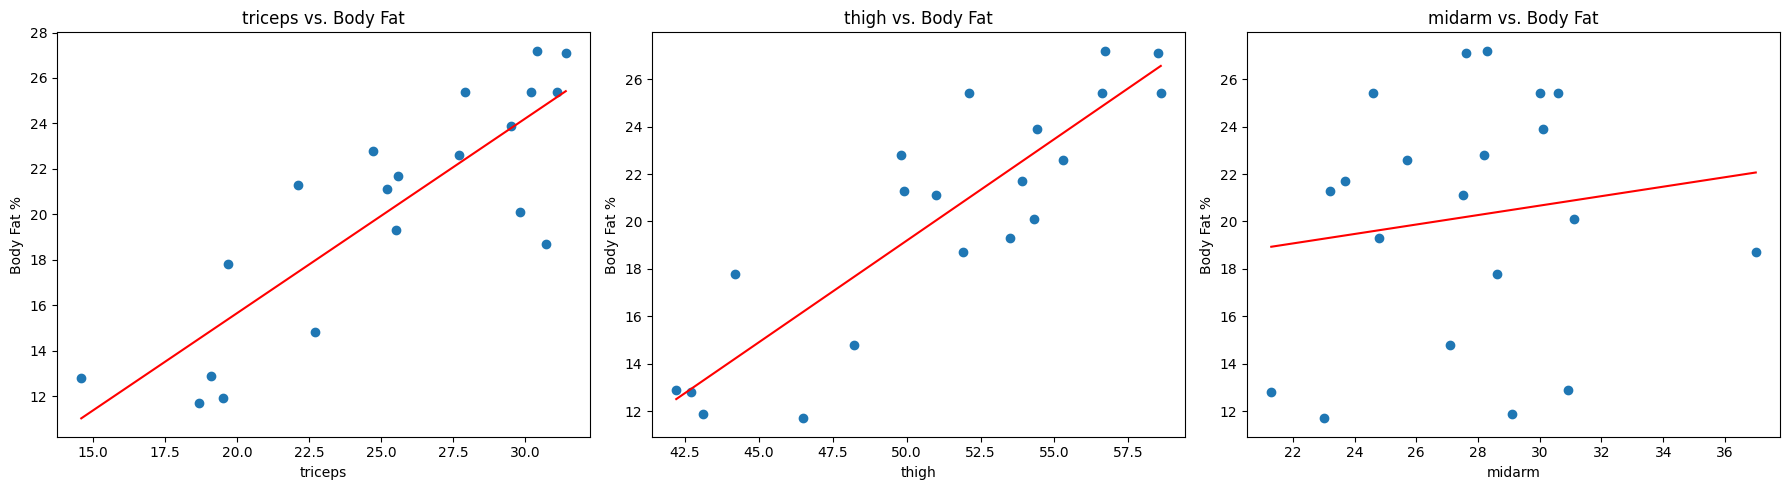

In [ ]:
# Create scatter plots of each feature vs body fat percentage
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Features to plot against bodyfat
features = ['triceps', 'thigh', 'midarm']

# Plot each feature vs. bodyfat with regression line
for i, feature in enumerate(features):
    axes[i].scatter(bodyfat_data[feature], bodyfat_data['bodyfat'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Body Fat %')
    axes[i].set_title(f'{feature} vs. Body Fat')
    
    # Add regression line
    m, b = np.polyfit(bodyfat_data[feature], bodyfat_data['bodyfat'], 1)
    x_range = np.linspace(bodyfat_data[feature].min(), bodyfat_data[feature].max(), 100)
    axes[i].plot(x_range, m*x_range + b, color='red')

plt.tight_layout()
plt.show()

# Split your dataset in train and test. 

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = bodyfat_data[['triceps', 'thigh', 'midarm']]  # Features
y = bodyfat_data['bodyfat']  # Target variable

# Split the dataset into training set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of our training and test sets
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Original dataset: {X.shape[0]} samples")

# Verify the split percentage
print(f"Test set percentage: {X_test.shape[0]/X.shape[0]:.2f}")

Training set: 16 samples
Test set: 4 samples
Original dataset: 20 samples
Test set percentage: 0.20


# Design a pre-processing for your dataset and apply it to your partitions.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a preprocessing pipeline
preprocessor = StandardScaler()

# Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply the same preprocessing to the test data
# Note: We only fit on training data to avoid data leakage
X_test_processed = preprocessor.transform(X_test)

# Convert back to DataFrames to maintain feature names
X_train_processed = pd.DataFrame(X_train_processed, 
                                columns=X_train.columns,
                                index=X_train.index)
X_test_processed = pd.DataFrame(X_test_processed, 
                              columns=X_test.columns,
                              index=X_test.index)

# Check the result of preprocessing
print("Before preprocessing (training data):")
print(X_train.describe().round(3))
print("\nAfter preprocessing (training data):")
print(X_train_processed.describe().round(3))

Before preprocessing (training data):
       triceps   thigh  midarm
count   16.000  16.000  16.000
mean    25.138  51.094  27.525
std      5.186   5.085   3.956
min     14.600  42.200  21.300
25%     21.500  47.775  24.525
50%     25.550  52.000  27.550
75%     29.950  54.550  30.150
max     31.400  58.500  37.000

After preprocessing (training data):
       triceps   thigh  midarm
count   16.000  16.000  16.000
mean     0.000   0.000   0.000
std      1.033   1.033   1.033
min     -2.099  -1.806  -1.625
25%     -0.724  -0.674  -0.783
50%      0.082   0.184   0.007
75%      0.958   0.702   0.685
max      1.247   1.504   2.473


# Train a Linear Regression model.

Linear Regression Model:
Training MSE: 4.994
Test MSE: 5.188
Training R²: 0.789
Test R²: 0.818

Model Coefficients:
triceps: 28.315
thigh: -19.726
midarm: -10.989
Intercept: 19.994


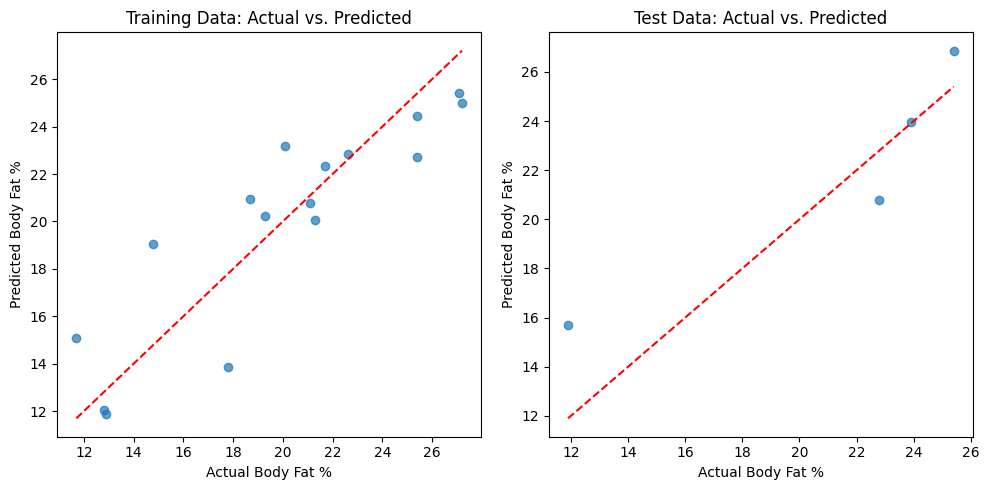

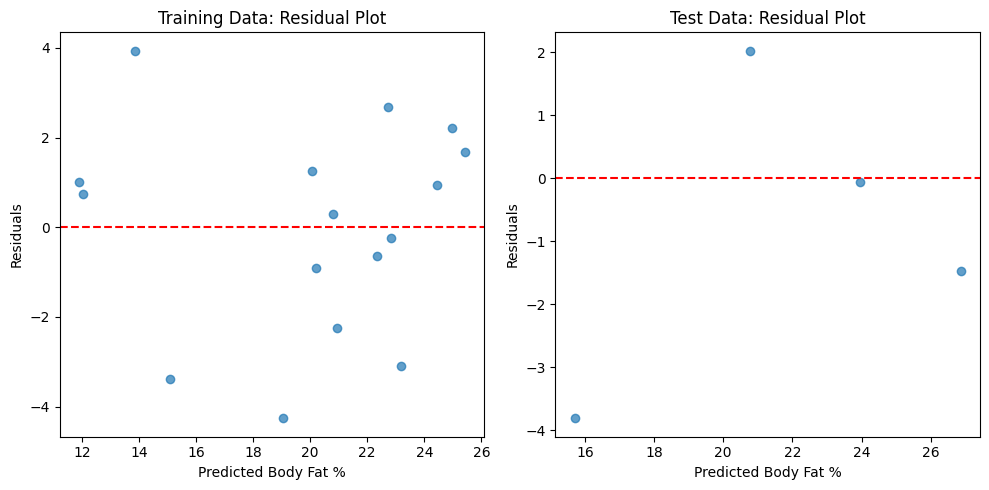

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Make predictions on training and test data
y_train_pred = lr_model.predict(X_train_processed)
y_test_pred = lr_model.predict(X_test_processed)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Linear Regression Model:")
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Training R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X_train.columns, lr_model.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"Intercept: {lr_model.intercept_:.3f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Training Data: Actual vs. Predicted')

# Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Test Data: Actual vs. Predicted')

plt.tight_layout()
plt.show()

# Visualize residuals
plt.figure(figsize=(10, 5))

# Training data residuals
plt.subplot(1, 2, 1)
residuals_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuals_train, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Body Fat %')
plt.ylabel('Residuals')
plt.title('Training Data: Residual Plot')

# Test data residuals
plt.subplot(1, 2, 2)
residuals_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuals_test, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Body Fat %')
plt.ylabel('Residuals')
plt.title('Test Data: Residual Plot')

plt.tight_layout()
plt.show()

# Train a Ridge Regression model with cross-validation.

Best alpha value: 1.000000
Ridge Regression Model (with CV):
Training MSE: 5.732
Test MSE: 4.526
Training R²: 0.758
Test R²: 0.841

Ridge Model Coefficients (alpha = 1.000000):
triceps: 2.116
thigh: 2.218
midarm: -0.480
Intercept: 19.994


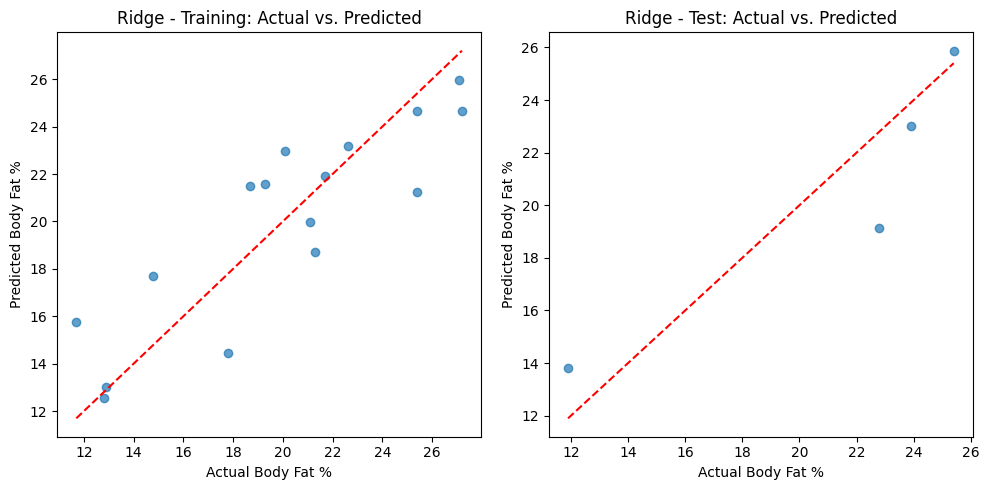

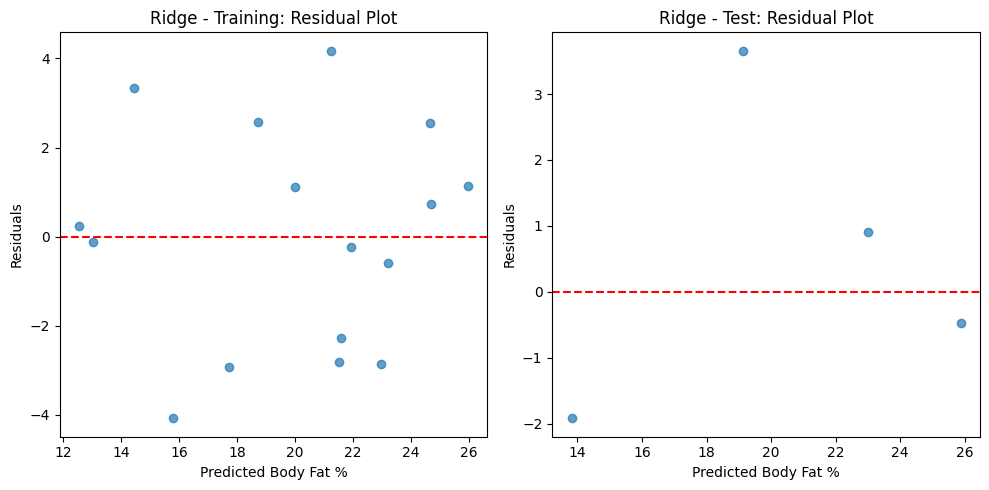

In [13]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define a range of alpha values to try
alphas = np.logspace(-6, 6, 13)  # 13 values from 10^-6 to 10^6

# Initialize and train Ridge regression with cross-validation
# cv=5 means 5-fold cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_processed, y_train)

# Get the best alpha value found by cross-validation
best_alpha = ridge_cv.alpha_
print(f"Best alpha value: {best_alpha:.6f}")

# Make predictions using the best model
y_train_pred_ridge = ridge_cv.predict(X_train_processed)
y_test_pred_ridge = ridge_cv.predict(X_test_processed)

# Evaluate the model
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Print evaluation metrics
print("Ridge Regression Model (with CV):")
print(f"Training MSE: {train_mse_ridge:.3f}")
print(f"Test MSE: {test_mse_ridge:.3f}")
print(f"Training R²: {train_r2_ridge:.3f}")
print(f"Test R²: {test_r2_ridge:.3f}")

# Print model coefficients
print("\nRidge Model Coefficients (alpha = {:.6f}):".format(best_alpha))
for feature, coef in zip(X_train.columns, ridge_cv.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"Intercept: {ridge_cv.intercept_:.3f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_ridge, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Ridge - Training: Actual vs. Predicted')

# Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Ridge - Test: Actual vs. Predicted')

plt.tight_layout()
plt.show()

# Visualize residuals
plt.figure(figsize=(10, 5))

# Training data residuals
plt.subplot(1, 2, 1)
residuals_train_ridge = y_train - y_train_pred_ridge
plt.scatter(y_train_pred_ridge, residuals_train_ridge, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Body Fat %')
plt.ylabel('Residuals')
plt.title('Ridge - Training: Residual Plot')

# Test data residuals
plt.subplot(1, 2, 2)
residuals_test_ridge = y_test - y_test_pred_ridge
plt.scatter(y_test_pred_ridge, residuals_test_ridge, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Body Fat %')
plt.ylabel('Residuals')
plt.title('Ridge - Test: Residual Plot')

plt.tight_layout()
plt.show()

# Train a Lasso Regression model with cross-validation. 

Best alpha value for Lasso: 0.215443
Lasso Regression Model (with CV):
Training MSE: 5.829
Test MSE: 4.679
Training R²: 0.754
Test R²: 0.836

Lasso Model Coefficients (alpha = 0.215443):
triceps: 0.840
thigh: 3.222
midarm: 0.000
Intercept: 19.994

Selected features by Lasso: ['triceps', 'thigh']


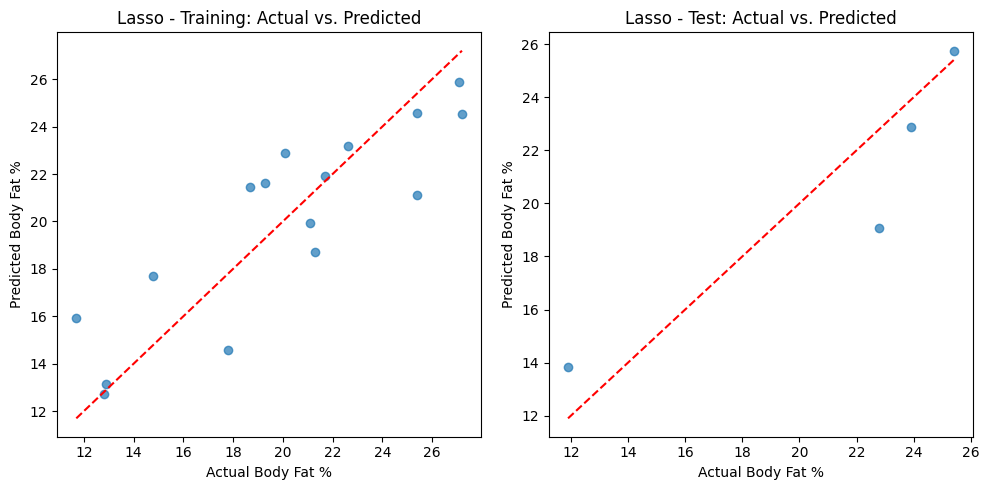

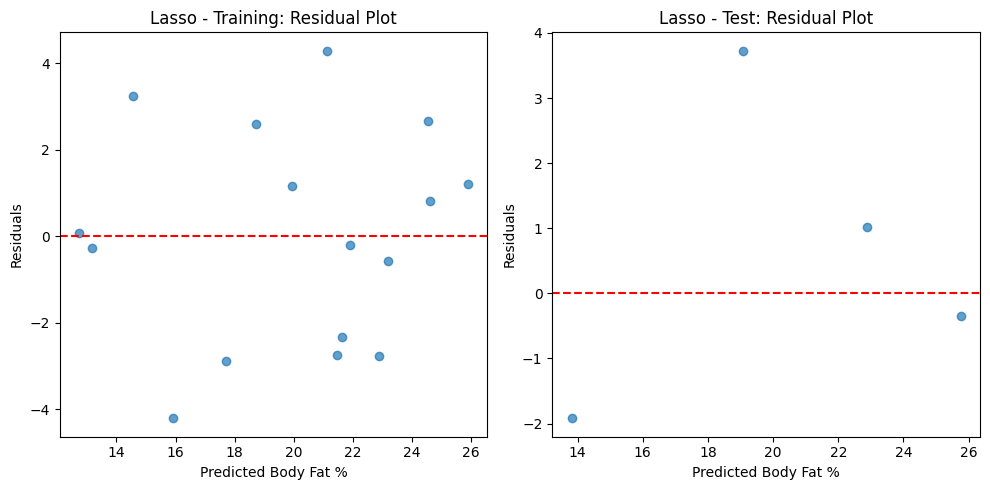

In [14]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define a range of alpha values to try
alphas = np.logspace(-6, 2, 100)  # More granular search for Lasso

# Initialize and train Lasso regression with cross-validation
# cv=5 means 5-fold cross-validation
# max_iter increased to ensure convergence
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000, tol=0.0001)
lasso_cv.fit(X_train_processed, y_train)

# Get the best alpha value found by cross-validation
best_alpha_lasso = lasso_cv.alpha_
print(f"Best alpha value for Lasso: {best_alpha_lasso:.6f}")

# Make predictions using the best model
y_train_pred_lasso = lasso_cv.predict(X_train_processed)
y_test_pred_lasso = lasso_cv.predict(X_test_processed)

# Evaluate the model
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Print evaluation metrics
print("Lasso Regression Model (with CV):")
print(f"Training MSE: {train_mse_lasso:.3f}")
print(f"Test MSE: {test_mse_lasso:.3f}")
print(f"Training R²: {train_r2_lasso:.3f}")
print(f"Test R²: {test_r2_lasso:.3f}")

# Print model coefficients
print("\nLasso Model Coefficients (alpha = {:.6f}):".format(best_alpha_lasso))
for feature, coef in zip(X_train.columns, lasso_cv.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"Intercept: {lasso_cv.intercept_:.3f}")

# Check which features were selected (non-zero coefficients)
selected_features = np.array(X_train.columns)[lasso_cv.coef_ != 0]
print(f"\nSelected features by Lasso: {selected_features.tolist()}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_lasso, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Lasso - Training: Actual vs. Predicted')

# Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lasso, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Lasso - Test: Actual vs. Predicted')

plt.tight_layout()
plt.show()

# Visualize residuals
plt.figure(figsize=(10, 5))

# Training data residuals
plt.subplot(1, 2, 1)
residuals_train_lasso = y_train - y_train_pred_lasso
plt.scatter(y_train_pred_lasso, residuals_train_lasso, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Body Fat %')
plt.ylabel('Residuals')
plt.title('Lasso - Training: Residual Plot')

# Test data residuals
plt.subplot(1, 2, 2)
residuals_test_lasso = y_test - y_test_pred_lasso
plt.scatter(y_test_pred_lasso, residuals_test_lasso, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Body Fat %')
plt.ylabel('Residuals')
plt.title('Lasso - Test: Residual Plot')

plt.tight_layout()
plt.show()

# Compare your three models using cross-validation metrics and looking into their weights. Do they show strong differences?

/var/folders/kk/fszrrjc10hjbfby2kz8vpsf00000gn/T/ipykernel_48393/7687115.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_results[model] for model in cv_results.keys()], labels=list(cv_results.keys()))


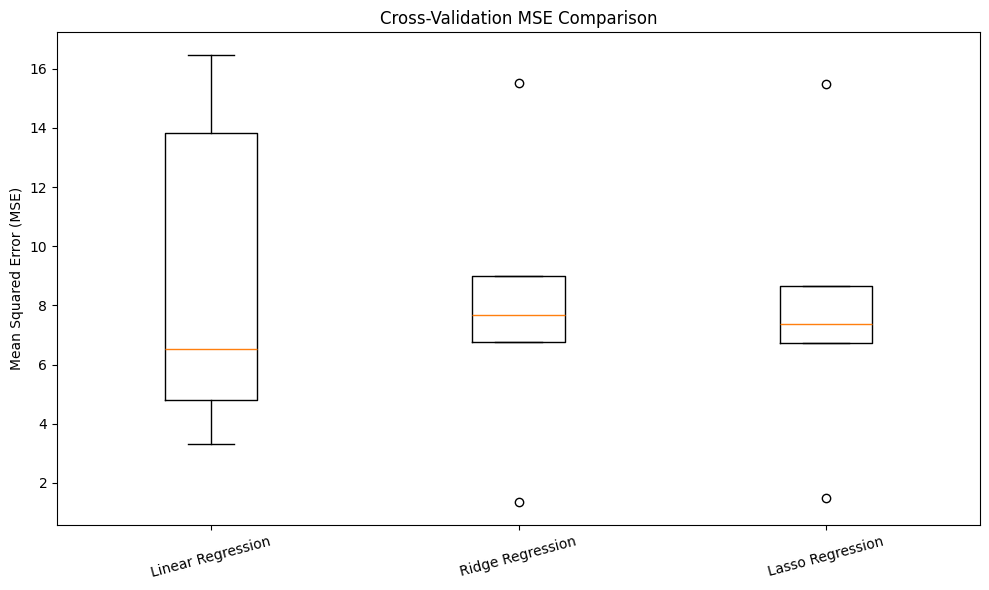

Comparison of Model Coefficients:
         Linear Regression  Ridge Regression  Lasso Regression
triceps             28.315             2.116             0.840
thigh              -19.726             2.218             3.222
midarm             -10.989            -0.480             0.000


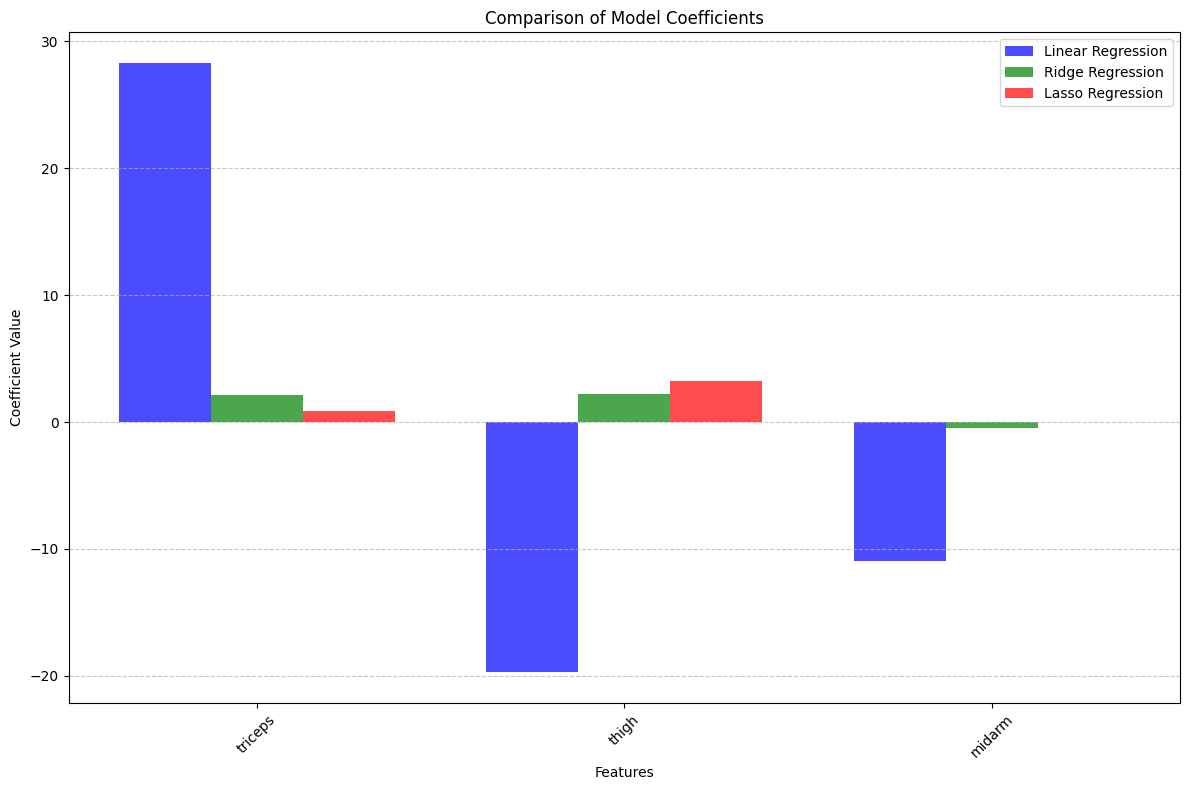


Summary of Model Performance:
                   Train MSE  Test MSE  Train R²  Test R²
Linear Regression      4.994     5.188     0.789    0.818
Ridge Regression       5.732     4.526     0.758    0.841
Lasso Regression       5.829     4.679     0.754    0.836

Total Coefficient Magnitude (L1 norm):
Linear Regression: 59.0300
Ridge Regression: 4.8139
Lasso Regression: 4.0623


In [17]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Set up models for comparison
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Initialize models with their best parameters
linear_model = LinearRegression()
ridge_model = Ridge(alpha=best_alpha)  # Using the best alpha from RidgeCV
lasso_model = Lasso(alpha=best_alpha_lasso)  # Using the best alpha from LassoCV

# Step 2: Perform cross-validation for all models
cv_folds = 5
models = {
    'Linear Regression': linear_model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model
}

cv_results = {}
for name, model in models.items():
    scores = -cross_val_score(model, X_train_processed, y_train, 
                             cv=cv_folds, scoring='neg_mean_squared_error')
    cv_results[name] = scores

# Step 3: Compare cross-validation performance
plt.figure(figsize=(10, 6))
plt.boxplot([cv_results[model] for model in cv_results.keys()], labels=list(cv_results.keys()))
plt.title('Cross-Validation MSE Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Step 4: Fit models on the entire training data
for name, model in models.items():
    model.fit(X_train_processed, y_train)

# Step 5: Compare model coefficients
coef_df = pd.DataFrame()
for name, model in models.items():
    coef_df[name] = model.coef_ if hasattr(model, 'coef_') else [0] * len(X_train.columns)
coef_df.index = X_train.columns

# Print coefficients side by side
print("Comparison of Model Coefficients:")
print(coef_df)

# Step 6: Visualize coefficient comparison
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(X_train.columns))

plt.bar(index - bar_width, coef_df['Linear Regression'], bar_width, 
        label='Linear Regression', color='blue', alpha=0.7)
plt.bar(index, coef_df['Ridge Regression'], bar_width, 
        label='Ridge Regression', color='green', alpha=0.7)
plt.bar(index + bar_width, coef_df['Lasso Regression'], bar_width, 
        label='Lasso Regression', color='red', alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.xticks(index, X_train.columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 7: Summary table of training and test metrics
summary = pd.DataFrame({
    'Train MSE': [train_mse, train_mse_ridge, train_mse_lasso],
    'Test MSE': [test_mse, test_mse_ridge, test_mse_lasso],
    'Train R²': [train_r2, train_r2_ridge, train_r2_lasso],
    'Test R²': [test_r2, test_r2_ridge, test_r2_lasso]
}, index=['Linear Regression', 'Ridge Regression', 'Lasso Regression'])

print("\nSummary of Model Performance:")
print(summary)

# Step 8: Calculate and display coefficient magnitude (L1 norm)
l1_norms = {
    'Linear Regression': np.sum(np.abs(models['Linear Regression'].coef_)),
    'Ridge Regression': np.sum(np.abs(models['Ridge Regression'].coef_)),
    'Lasso Regression': np.sum(np.abs(models['Lasso Regression'].coef_))
}

print("\nTotal Coefficient Magnitude (L1 norm):")
for model, l1 in l1_norms.items():
    print(f"{model}: {l1:.4f}")

# Compute the generalization performance of the best model.

The best model based on Test MSE is: Ridge Regression

Detailed Generalization Performance:
Mean Squared Error (MSE): 4.5264
Root Mean Squared Error (RMSE): 2.1275
Mean Absolute Error (MAE): 1.7386
R² Score: 0.8409


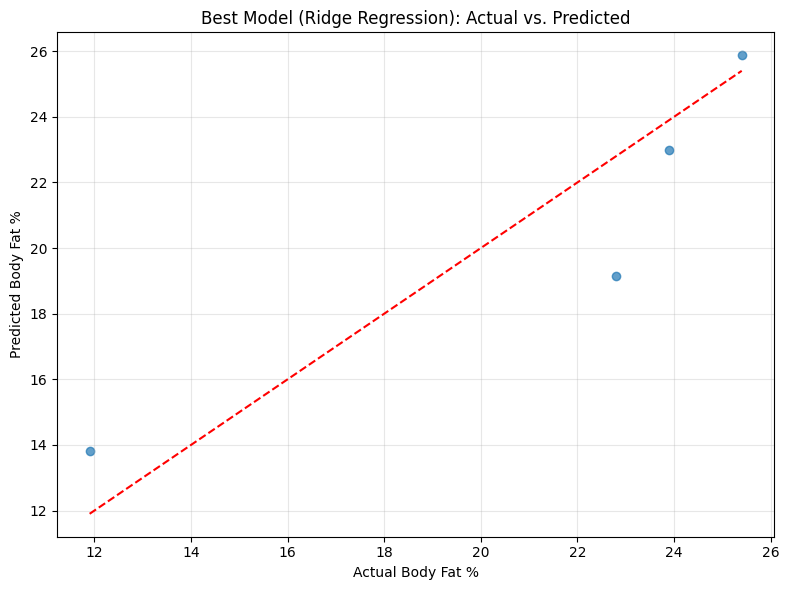

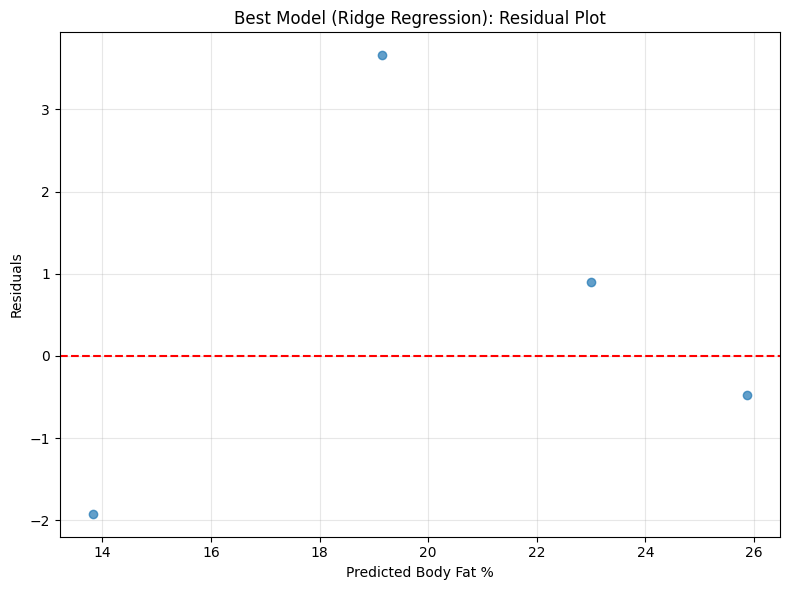

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

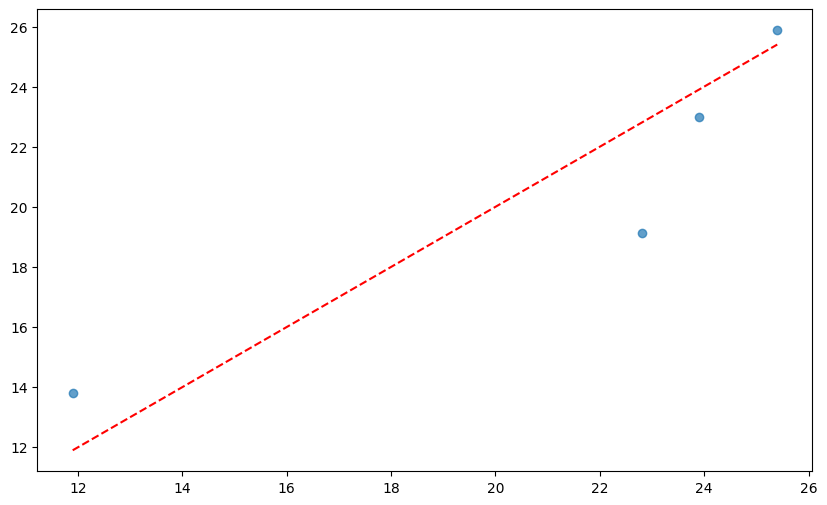

In [18]:
# Step 1: Identify the best model based on test set performance
best_model_name = summary.loc[summary['Test MSE'].idxmin()]
print(f"The best model based on Test MSE is: {summary['Test MSE'].idxmin()}")

# Step 2: Get the corresponding trained model
best_model = models[summary['Test MSE'].idxmin()]

# Step 3: Compute detailed performance metrics on the test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(X_test_processed)

# Calculate various metrics
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\nDetailed Generalization Performance:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R² Score: {test_r2:.4f}")

# Step 4: Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title(f'Best Model ({summary["Test MSE"].idxmin()}): Actual vs. Predicted')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Step 5: Visualize the residuals
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Body Fat %')
plt.ylabel('Residuals')
plt.title(f'Best Model ({summary["Test MSE"].idxmin()}): Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Step 6: Calculate prediction intervals (if desired)
# This gives an approximate 95% prediction interval
residual_std = np.std(residuals)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Predictions')

# Plot prediction intervals
sorted_indices = np.argsort(y_test)
plt.fill_between(
    y_test.iloc[sorted_indices], 
    (y_pred.iloc[sorted_indices] - 1.96 * residual_std), 
    (y_pred.iloc[sorted_indices] + 1.96 * residual_std), 
    color='gray', alpha=0.2, label='95% Prediction Interval'
)

plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title(f'Best Model ({summary["Test MSE"].idxmin()}) with Prediction Intervals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Advanced Exercise: Try to improve the results of the lab session

There are some points that could be improved from the lab session. 
- [ ] Linear regression is strongly affected by outliers. Design a strategy for removing outliers. Does it improve the validation metrics with respect to the best ones of the lab. 
- [ ] We have ignored (almost) completely our missing values. Design a strategy for handling missing values. Does it improve the validation metrics with respect to the best ones of the lab.   
- [ ] Some variables are not looking gaussian. Transforming them could improve your model performance. Does this improve validation metrics and/or generalization of the best model?

In [11]:
life_expentancy_data = pd.read_csv('Life_Expectancy_Data.csv')
# We remove spaces and symbols to avoid problems with statsmodel GLM
life_expentancy_data.columns = [c.lower().strip().replace(' ','_').replace('/','_').replace('-','_') for c in life_expentancy_data.columns] 

# We change the type of categorical variables into category
categorical_columns = list(life_expentancy_data.dtypes[life_expentancy_data.dtypes == 'O'].index.values)
for column in categorical_columns:
    life_expentancy_data[column] = life_expentancy_data[column].astype('category')

life_expentancy_data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.280,65.0,1154,...,6.0,8.16,65.0,0.1,584.259,3.374e+07,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.524,62.0,492,...,58.0,8.18,62.0,0.1,612.697,3.276e+05,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219,64.0,430,...,62.0,8.13,64.0,0.1,631.745,3.173e+07,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184,67.0,2787,...,67.0,8.52,67.0,0.1,669.959,3.697e+06,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097,68.0,3013,...,68.0,7.87,68.0,0.1,63.537,2.979e+06,18.2,18.2,0.454,9.5
